## Victor Moraes - 2016027600

## Sexto trabalho pratico de reconhecimento de padrões
# LS - SVM - Máquinas de vetores de suporte de mínimos quadráticos


# Introdução

Neste trabalho, será aplicado o classificador LS-SVM na resolução de um problema de classificação sintético.

Neste exercı́cio o(a) aluno(a) aplicará o classificador LS-SVM na resolução de um
problema de classificação real.  
O aluno deverá seguir os seguintes passos:  
1. Carregar a base de dados;   
2. Separar os dados em treinamento e teste; 
3. Treinar a SVM (atenção para a definição dos parâmetros do kernel escolhido
e do parâmetro C de regularização da SVM.);  
O aluno deve treinar uma SVM para resolver o problema de classificação
de tipos de vidros do banco de dados Glass a partir de suas caracterı́sticas
quı́micas. Ele possui 214 instâncias de 10 atributos. Entradas numéricas e
variável de saida categórica Este banco de dados já é nativo do R para aqueles
que estão utilizando o R mas pode ser encontrado no UCI Machine Learning
Repositóry.  
No relatório deverá ser mostrado a acurácia média e desvio padrão para 10
experimentos variando o conjunto de treinamento e teste. Apresentar também
quais os parâmetros definidos por você e como eles foram definidos, como por
exemplo o parâmetro C.

## 1- Conjunto de testes.
Inicialmente importaremos as bibliotecas necessárias e em seguida criaremos o conjunto de amostras. 



In [1]:
import numpy as np
import pandas as pd
import sys

#sys.path.insert(0, './LSSVMlib/')
from LSSVMlib.LSSVMClassification import LSSVMClassification
lssvc = LSSVMClassification(gamma=1, kernel='rbf', sigma=3.5) # Class instantiation

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, ScalarFormatter
from sklearn.model_selection import train_test_split
from matplotlib.colors import Normalize

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



In [2]:
glass = pd.read_csv('glass.csv').dropna()
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
labels = pd.read_csv('classifications.csv').dropna()
labels.head()

,building_windows_float_processed,building_windows_non_float_processed,vehicle_windows_float_processed,vehicle_windows_non_float_processed (none in this database),containers,tableware,headlamps
0,1,2,3,4,5,6,7


<p style="page-break-after:always;"></p>

## 2. Separação de conjuntos de treinamento e testes

Neste ponto é realizada a separação de amostras de treino e validação iniciais.


In [5]:
glass.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

In [7]:
X = glass.iloc[:,1:-1].to_numpy()
print(X.shape)

y = glass.iloc[:,-1:].to_numpy().ravel()
print(y.shape)

(214, 9)
(214,)


In [8]:
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

enable_scalar = True

In [9]:
sc_train = StandardScaler().fit(X_train)
sc_test = StandardScaler().fit(X_test)
sc_all = StandardScaler().fit(X)

if(enable_scalar == True):
    X_train_std = sc_train.transform(X_train)
    X_test_std = sc_test.transform(X_test)
    X_std = sc_all.transform(X)
else:
    X_train_std = X_train 
    X_test_std = sc_test.transform(X_test)
    X_std = sc_all.transform(X)
        

In [11]:
# Get information about input and outputs
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape:  {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape:  {y_test.shape}")
print(f"np.unique(y_train): {np.unique(y_train)}")
print(f"np.unique(y_test):  {np.unique(y_test)}")

X_train.shape: (171, 9)
X_test.shape:  (43, 9)
y_train.shape: (171,)
y_test.shape:  (43,)
np.unique(y_train): [1 2 3 5 6 7]
np.unique(y_test):  [1 2 3 5 6 7]


## 3 Treinamento inicial do modelo, com parametros a determinar.

Será utilizado a implementação SVC, ou classificação de vetores de suporte. Nesta implementação é permitido que os pontos não sejam necessariamente linearmente separáveis, sendo o desvio tolerável ditado pelo parâmetro C. 
Para determinar isso foi feito uma busca em rede para validar qual kernel e quais parametros possuem o melhor desempenho. A busca em rede conta com validação cruzada kfold com 5 conjuntos para cada classificador testado. 

Obtivemos que o kernel rbf ( radial basis function ), ou função radial, foi a de melhor acurácia.

Outro parametro do kernel RBF é o gamma, representado na equação a seguir por sigma. É um parâmetro do kernel que determina a geometria e curvatura do superplano de classificação.    
Aqui é utilizado o kernel radial : $K(x_i,x_j)= exp(-\frac{||x_i-x_j||}{2\sigma^2})$


Para a escolha de C e gama, adiante será feita varredura e de forma que evite overfitting e maximize a média de acertos.

O problema de otimização do LS-SVM, como demonstra Suykens, na equação 3.5, se trata de solucionar o seguinte sistema linear:

![drawing](images/01.png)

E a predição é feita por:

![drawing](images/02.png)

Sendo $\Omega = y^t y K(X,X)$


Nos itens a seguir é investigado qual topologia apresenta melhor acurácia. RBT apresentou o melhor escore. Portanto é realizado uma busca em grid neste e variando gamma e sigma, para se encontrar o melhor modelo.

In [17]:
# Use the classifier with different kernels

print('Gaussian kernel:')
lssvc = LSSVMClassification(gamma=1, kernel='rbf', sigma=3.5) # Class instantiation
lssvc.fit(X_train_std, y_train) # Fitting the model
y_pred = lssvc.predict(X_test_std) # Making predictions with the trained model
acc = accuracy_score(y_test, y_pred) # Calculate Accuracy
print('acc_test = ', acc, '\n')

Gaussian kernel:
acc_test =  0.7209302325581395 



In [20]:


print('Polynomial kernel:')
lssvc = LSSVMClassification(gamma=1, kernel='poly', d=2)
lssvc.fit(X_train_std, y_train)
y_pred = lssvc.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print('acc_test = ', acc, '\n')

print('Linear kernel:')
lssvc = LSSVMClassification(gamma=1, kernel='linear')
lssvc.fit(X_train_std, y_train)
y_pred = lssvc.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print('acc_test = ', acc, '\n')

Polynomial kernel:
acc_test =  0.5813953488372093 

Linear kernel:
acc_test =  0.5581395348837209 



In [23]:
kernels = ['poly', 'rbf']
#kernels = ['linear', 'poly', 'rbf', 'sigmoid']
#C_range = np.logspace(-3,6,2)
C_gamma = np.logspace(-6,3,50)
#coef_0_range = np.linspace(-100,100,10)

#coef_0_range = np.linspace(-10,10,5)
param_grid = {
    'kernel':kernels,
    'gamma':C_gamma,
}

grid = GridSearchCV(LSSVMClassification(), param_grid=param_grid, n_jobs=3, verbose=True)
grid.fit(X_std, y)
grid.best_params_

best_estimator = grid.best_estimator_
best_estimator.fit(X_train_std,y_train)
final_score = best_estimator.score(X_test_std, y_test)
print("The best parameters are {} with a score of {:2.2f} %"
.format(grid.best_params_, 100*final_score))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best parameters are {'gamma': 120.67926406393313, 'kernel': 'rbf'} with a score of 60.47 %


In [34]:
sigma_range = np.logspace(-1, 3, 30)
gamma_range = np.logspace(-1, 1, 30)
param_grid = dict(sigma=sigma_range, gamma=gamma_range)
grid = GridSearchCV(LSSVMClassification(), param_grid=param_grid, n_jobs=3, verbose=True)
grid.fit(X_std, y)
grid.best_params_

best_estimator = grid.best_estimator_
best_estimator.fit(X_train_std,y_train)
final_score = best_estimator.score(X_test_std, y_test)
print("The best parameters are {} with a score of {:2.2f} %"
.format(grid.best_params_, 100*final_score))

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
The best parameters are {'gamma': 2.807216203941177, 'sigma': 4.520353656360243} with a score of 60.47 %


Aqui é apresentado o gráfico de acurácia da busca de grid, identificando õtimos locais de maior desempenho.

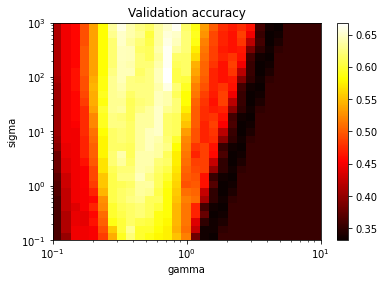

In [41]:
scores_plot = np.reshape(grid.cv_results_['mean_test_score'],(gamma_range.shape[0],sigma_range.shape[0]))
gamma_plot = grid.cv_results_['param_gamma']
sigma_plot = grid.cv_results_['param_sigma']
#plt.axhline(grid.best_params_['sigma'], color='gray')
#plt.axvline(grid.best_params_['gamma'], color='gray')
X_mesh,Y_mesh=np.meshgrid(gamma_range,sigma_range)
Z = scores_plot
im = plt.pcolor(X_mesh,Y_mesh,Z, cmap=plt.cm.hot)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('gamma')
plt.ylabel('sigma')
plt.colorbar(im, orientation='vertical')
plt.title('Validation accuracy')
plt.show()

Em seguida realizamos a validação com todo conjunto de testes, obtendo acurácia de 60.47 %

## 3.d Escolha de modelo
Como pode-se ver a seguir, a biblioteca seleciona o primeiro melhor estimador na métrica de escore, que foi o seguintes hiper parametros e kernel rbt:  
{'gamma': 2.807216203941177, 'sigma': 4.520353656360243}



# Cross validation

O estimador será validado utilizando cross validation kfold, de 10 grupos.

In [42]:
scores = cross_val_score(best_estimator, X_std, y, cv=10)
print()
print(scores)


mean_score = np.mean(scores) * 100
mean_std = np.std(scores) * 100

print('Score medio:{:.2f}%, desvio medio:{:.2f}%'.format(mean_score, mean_std))
print(10*'\n')


/home/vektor/.virtualenvs/science/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"

[0.63636364 0.54545455 0.77272727 0.68181818 0.47619048 0.61904762
 0.76190476 0.71428571 0.66666667 0.76190476]
Score medio:66.36%, desvio medio:9.27%













Portanto temos que a acuracia final foi de 66.36%, com desvio médio de 5.75%.

A baixa acuracia se deve, provavelmente, a quantidade baixa de amostras por classe.

## Demonstração de predição

Aqui é feita uma demonstração e faz a previsão corretamente da amostra de vidro do tipo 2.

In [43]:
sample = glass.iloc[70].to_numpy()[1:-1].reshape(1, -1)
glass.iloc[70]

Id       71.00000
 RI       1.51574
 Na      14.86000
 Mg       3.67000
 Al       1.74000
 Si      71.87000
 K        0.16000
 Ca       7.36000
 Ba       0.00000
 Fe       0.12000
 Type     2.00000
Name: 70, dtype: float64

In [45]:
best_estimator.predict(sc_all.transform(sample))

array([[2]])

# Conclusão


Neste trabalho foi aplicar o algoritmo de LS-SVM, para um problema prático de classificação. Apresentou baixa acurácia, em relação a implementação de SVM do scikit learn mesmo com sintonia de hiperparametros. Provavelmente se deve a implementação melhor otimizada, o que possibilitou uma busca mais completa no exercicio anterior, com o dobro de amostras.

Para este trabalho também foi necessário a implementação de um classificado LS-SVM compativel com a API do scikitLearn, para que fosse possivel realizar busca em grid. Disponível no repositório do autor.

## Referências:
*Victor Moraes* https://github.com/vic-torr/LSSVMlib

J.A.K. Suykens et al., “Least Squares Support Vector Machines“, World Scientific Pub. Co., Singapore, 2002 (ISBN 981-238-151-1)

*Danny E.P. Vanpoucke* - https://dannyvanpoucke.be/building-scikit-learn-regressor-lssvm-en/

C support vector classification - SciKitLearn
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC  


Gridsearch - SciKitLearn
https://scikit-learn.org/stable/modules/grid_search.html#grid-search